## Horses or Humans

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg

In [ ]:
# training data

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /content/horse-or-human.zip

--2021-07-27 10:31:23--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 66.102.1.128, 172.253.120.128, 142.250.13.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|66.102.1.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/content/horse-or-human.zip’

/content/horse-or-h 100%[===================>] 142.65M   109MB/s    in 1.3s    

2021-07-27 10:31:25 (109 MB/s) - ‘/content/horse-or-human.zip’ saved [149574867/149574867]



In [ ]:
# validation data

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /content/validation-horse-or-human.zip

--2021-07-27 10:31:26--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.5.128, 74.125.206.128, 64.233.167.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.5.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/content/validation-horse-or-human.zip’

/content/validation 100%[===================>]  10.95M  41.2MB/s    in 0.3s    

2021-07-27 10:31:26 (41.2 MB/s) - ‘/content/validation-horse-or-human.zip’ saved [11480187/11480187]



In [ ]:
# content -> horse-or-human -> horses -> horse images
# content -> horse-or-human -> humans -> human images

import os
import zipfile

local_zip = '/content/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/horse-or-human')
zip_ref.close()

In [ ]:
# content -> validation-horse-or-human -> horses -> horse images
# content -> validation-horse-or-human -> humans -> human images

local_zip = '/content/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/validation-horse-or-human')
zip_ref.close()

In [ ]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/content/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/content/horse-or-human/humans')

In [ ]:
# Directory with our validation horse pictures
validation_horse_dir = os.path.join('/content/validation-horse-or-human/horses')

# Directory with our validation human pictures
validation_human_dir = os.path.join('/content/validation-horse-or-human/humans')

In [ ]:
# checking out file names in horse and human training folders

train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse04-8.png', 'horse01-9.png', 'horse19-2.png', 'horse08-4.png', 'horse08-6.png', 'horse27-4.png', 'horse40-9.png', 'horse40-4.png', 'horse36-8.png', 'horse21-0.png']
['human08-22.png', 'human11-14.png', 'human15-10.png', 'human13-14.png', 'human14-18.png', 'human02-25.png', 'human03-23.png', 'human05-02.png', 'human10-21.png', 'human13-04.png']


In [ ]:
# checking out file names in horse and human validation folders

validation_horse_hames = os.listdir(validation_horse_dir)
print(validation_horse_hames[:10])

validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])

['horse2-040.png', 'horse5-519.png', 'horse5-275.png', 'horse4-232.png', 'horse1-411.png', 'horse4-541.png', 'horse3-584.png', 'horse4-014.png', 'horse2-011.png', 'horse4-000.png']
['valhuman05-27.png', 'valhuman03-01.png', 'valhuman03-05.png', 'valhuman03-04.png', 'valhuman02-06.png', 'valhuman01-21.png', 'valhuman04-20.png', 'valhuman05-15.png', 'valhuman02-04.png', 'valhuman03-09.png']


In [ ]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


In [ ]:
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))

total validation horse images: 128
total validation human images: 128


In [ ]:
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

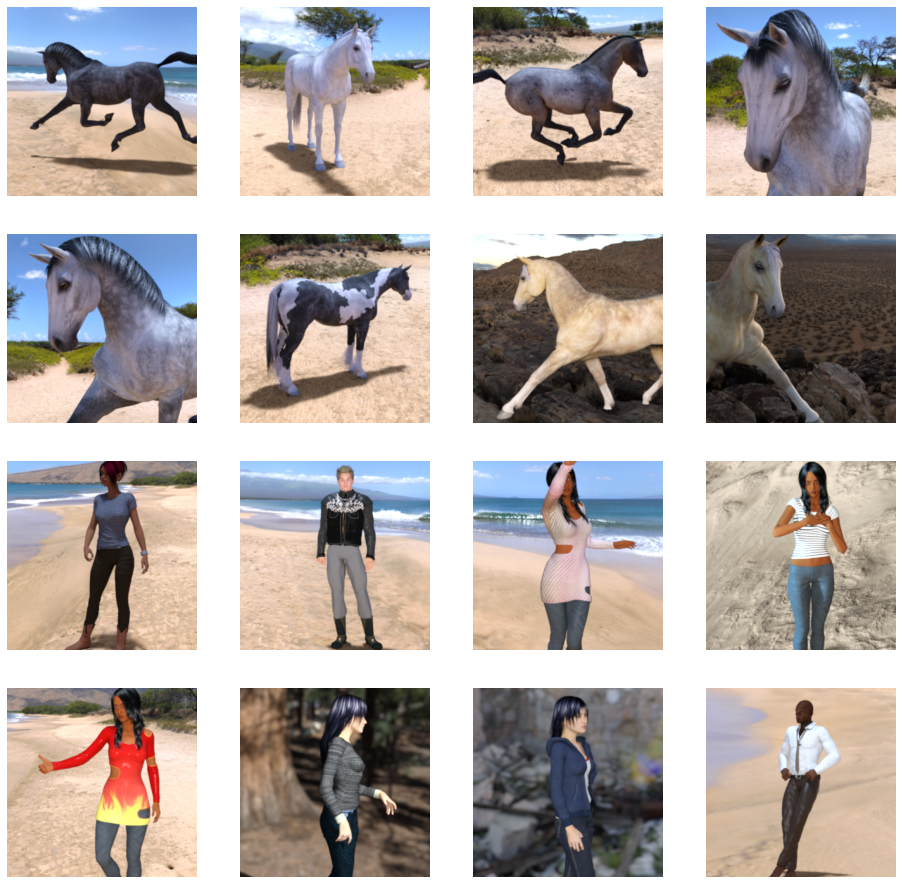

In [ ]:
# display a batch of 8 horse and 8 human pictures

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color

    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)   # all images rescaled by 1./255

train_generator = train_datagen.flow_from_directory(
            '/content/horse-or-human/',             # directory for training images
            target_size=(300, 300),                 # same as input size image
            batch_size=128,                         # batch of 128
            class_mode='binary')                    # since we use binary_crossentropy loss, we need binary labels

Found 1027 images belonging to 2 classes.


In [ ]:
validation_datagen = ImageDataGenerator(rescale=1/255)

validation_generator = validation_datagen.flow_from_directory(
        '/content/validation-horse-or-human/', 
        target_size=(300, 300),  
        batch_size=32,
        class_mode='binary')

Found 256 images belonging to 2 classes.


In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 42s 1s/step - loss: 1.1465 - accuracy: 0.5628 - val_loss: 0.5879 - val_accuracy: 0.7383
Epoch 2/15
8/8 [==============================] - 9s 1s/step - loss: 0.4724 - accuracy: 0.8020 - val_loss: 0.5855 - val_accuracy: 0.7773
Epoch 3/15
8/8 [==============================] - 9s 1s/step - loss: 0.7479 - accuracy: 0.8053 - val_loss: 0.5340 - val_accuracy: 0.7891
Epoch 4/15
8/8 [==============================] - 9s 1s/step - loss: 0.2627 - accuracy: 0.8999 - val_loss: 0.8429 - val_accuracy: 0.8633
Epoch 5/15
8/8 [==============================] - 9s 1s/step - loss: 0.3795 - accuracy: 0.8854 - val_loss: 0.5414 - val_accuracy: 0.8789
Epoch 6/15
8/8 [==============================] - 8s 1s/step - loss: 0.1883 - accuracy: 0.9221 - val_loss: 0.9909 - val_accuracy: 0.8438
Epoch 7/15
8/8 [==============================] - 9s 1s/step - loss: 0.1201 - accuracy: 0.9555 - val_loss: 1.0730 - val_accuracy: 0.8633
Epoch 8/15
8/8 [========================

In [ ]:
# load image to test

from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
 

Saving hqdefault.jpg to hqdefault (1).jpg
[0.]
hqdefault.jpg is a horse


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


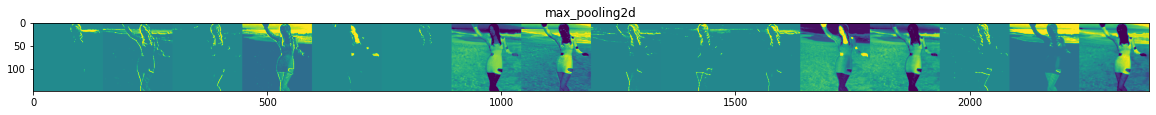

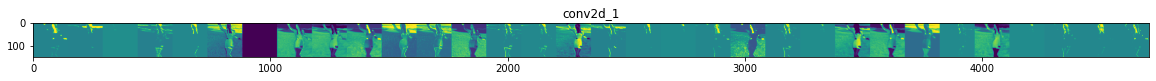

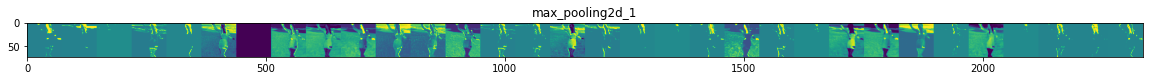

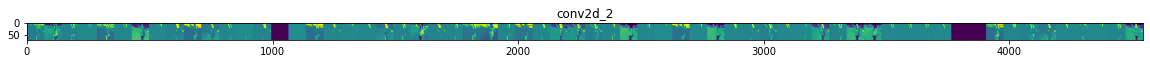

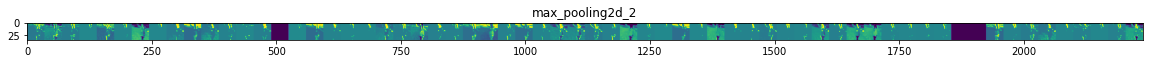

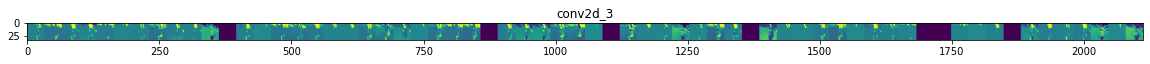

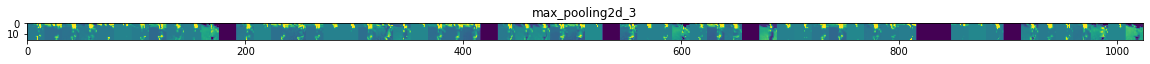

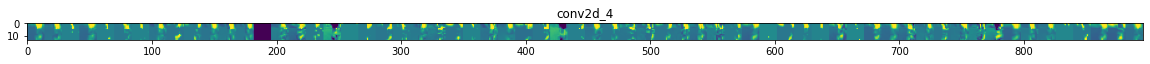

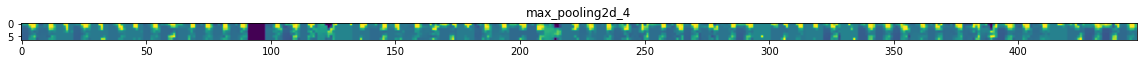

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
# to terminate the kernel and free memory resources

import os, signal
os.kill(os.getpid(), signal.SIGKILL)

## Happy or Sad Exercise

**Exercise 4**

Below is code with a link to a happy or sad dataset which contains 80 images, 40 happy and 40 sad. Create a convolutional neural network that trains to 100% accuracy on these images, which cancels training upon hitting training accuracy of >.999

Hint -- it will work best with 3 convolutional layers.

In [ ]:
!wget --no-check-certificate \
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
    -O "/content/happy-or-sad.zip"

--2021-07-27 07:43:07--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.23.128, 74.125.203.128, 74.125.204.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.23.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘/content/happy-or-sad.zip’

/content/happy-or-s 100%[===================>]   2.55M  --.-KB/s    in 0.02s   

2021-07-27 07:43:07 (102 MB/s) - ‘/content/happy-or-sad.zip’ saved [2670333/2670333]



In [ ]:
zip_ref = zipfile.ZipFile("/content/happy-or-sad.zip", 'r')
zip_ref.extractall("/content/h-or-s")
zip_ref.close()

In [ ]:
DESIRED_ACCURACY = 0.999

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>DESIRED_ACCURACY):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        "/content/h-or-s",  
        target_size=(150, 150), 
        batch_size=10,
        class_mode='binary')

Found 80 images belonging to 2 classes.


In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=2,  
      epochs=15,
      verbose=1,
      callbacks=[callbacks])

Epoch 1/15
2/2 [==============================] - 1s 28ms/step - loss: 3.5131 - accuracy: 0.4000
Epoch 2/15
2/2 [==============================] - 0s 26ms/step - loss: 0.8437 - accuracy: 0.6000
Epoch 3/15
2/2 [==============================] - 0s 30ms/step - loss: 0.8484 - accuracy: 0.2500
Epoch 4/15
2/2 [==============================] - 0s 34ms/step - loss: 0.5763 - accuracy: 0.7500
Epoch 5/15
2/2 [==============================] - 0s 26ms/step - loss: 0.3345 - accuracy: 0.9000
Epoch 6/15
2/2 [==============================] - 0s 27ms/step - loss: 1.1860 - accuracy: 0.4500
Epoch 7/15
2/2 [==============================] - 0s 29ms/step - loss: 0.2290 - accuracy: 1.0000

Reached 99.9% accuracy so cancelling training!
